In [1]:
###  가위바위보 프로젝트 제출

In [2]:
# 사용할 라이브러리 버전을 확인

In [4]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [5]:
# 필요한 라이브러리 호출
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [6]:
# 가위 이미지를 불러와서 28x28 사이즈로 변경

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

113  images to be resized.
113  images resized.
가위 이미지 resize 완료!


In [7]:
# 바위 이미지도 28x28로 변경

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

113  images to be resized.
113  images resized.
바위 이미지 resize 완료!


In [8]:
# 보 이미지도 28x28로 변경

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

123  images to be resized.
123  images resized.
보 이미지 resize 완료!


In [9]:
# 숫자 손글자 인식기 설정\
# load_data() 함수 만들기  (이미지가 있는 폴더 위치를 받는다.)

import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 356 입니다.
x_train shape: (600, 28, 28, 3)
y_train shape: (600,)


라벨:  0


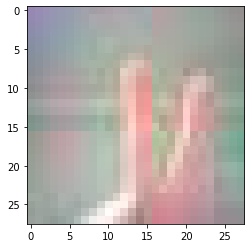

In [10]:
# 실제 이미지를 불러온다.

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [11]:
# 가위바위보를 인식하는 딥러닝 네트워크를 설계한다.

import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?


model = keras.models.Sequential()   # 새로운 모델을 만든다.
model.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 3)))  # 1. 이미지에서 특징을 감지하는 Convolutional 레이어를 추가한다.
model.add(keras.layers.MaxPool2D(2, 2))                                  # 2. 특징 맵을 축소하는 MaxPooling 레이어를 한다.
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))            # 3. 더 복잡한 특징을 감지하는 두 번째 Convolutional 레이어를 한다.
model.add(keras.layers.MaxPooling2D((2, 2)))                             # 4. 다시 특징 맵을 축소하는 두 번째 MaxPooling 레이어를 추가한다..
model.add(keras.layers.Flatten())                                        # 5. 모든 특징을 하나의 일렬로 펼치는 Flatten 레이어를 추가한다.
model.add(keras.layers.Dense(32, activation='relu'))                     # 6. 특징을 기반으로한 판단을 하는 Dense 레이어를 추가한다.
model.add(keras.layers.Dense(10, activation='softmax'))                  # 7. 최종적인 판단 결과를 출력하는 Dense 레이어를 추가한다. (클래스가 10개이므로 10개의 뉴런)
print('Model에 추가된 Layer 개수: ', len(model.layers))                  # 현재까지 추가된 Layer의 개수를 출력한다.


model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (No

In [12]:
# 딥러닝 네트워크 학습시킨다.

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
19/19 [==============================] - 1s 20ms/step - loss: 6.4835 - accuracy: 0.5467
Epoch 2/10
19/19 [==============================] - 0s 19ms/step - loss: 1.5890 - accuracy: 0.7150
Epoch 3/10
19/19 [==============================] - 0s 19ms/step - loss: 1.2102 - accuracy: 0.8167
Epoch 4/10
19/19 [==============================] - 0s 19ms/step - loss: 0.8981 - accuracy: 0.8567
Epoch 5/10
19/19 [==============================] - 0s 20ms/step - loss: 0.5322 - accuracy: 0.9033
Epoch 6/10
19/19 [==============================] - 0s 20ms/step - loss: 0.3311 - accuracy: 0.9117
Epoch 7/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1974 - accuracy: 0.9417
Epoch 8/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1662 - accuracy: 0.9483
Epoch 9/10
19/19 [==============================] - 0s 19ms/step - loss: 0.1264 - accuracy: 0.9617
Epoch 10/10
19/19 [==============================] - 0s 20ms/step - loss: 0.1220 - accuracy: 0.9583


In [14]:
# 테스트용 데이터인 x_test, y_test를 만든다.

from PIL import Image
import glob
import os
import numpy as np  

print("PIL 라이브러리 import 완료!")

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    target_size = (28, 28)
    resized_images = []  

    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")

                                                   
        img_array = np.array(new_img)              # 이미지를 numpy 배열로 변환하여 리스트에 추가 (모든 이미지의 차원을 일치시킨다.
        img_array = img_array.reshape(28, 28, 3)   # 이미지의 차원을 (높이, 너비, 채널)로 맞추어준다.
        resized_images.append(img_array)

    print(len(images), " images resized.")
    return np.array(resized_images)  # 수정된 부분

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
x_test_scissor = resize_images(image_dir_path)  
y_test_scissor = np.zeros(len(x_test_scissor))  

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
x_test_rock = resize_images(image_dir_path)  
y_test_rock = np.ones(len(x_test_rock))  

print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
x_test_paper = resize_images(image_dir_path)  
y_test_paper = np.full(len(x_test_paper), 2)  

print("보 이미지 resize 완료!")

# x_test, y_test 생성
x_test = np.concatenate((x_test_scissor, x_test_rock, x_test_paper), axis=0)
y_test = np.concatenate((y_test_scissor, y_test_rock, y_test_paper), axis=0)


PIL 라이브러리 import 완료!
0  images to be resized.
0  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 4 dimension(s)

In [16]:
# 준비한 테스트용 데이토로 위에서 훈련시킨 model을 사용하여 test_accuracy를 측정한다.

# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# 데이터셋 로드 및 전처리 (예시로 데이터셋을 x_train, y_train으로 가정)
# x_train, y_train은 이미지와 레이블에 해당하는 데이터야 한다.
# 이 예시에서는 임의의 데이터를 사용하므로 실제 데이터에 맞게 수정이 필요하다.

# 모델 정의
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 3)))  # 예시로 입력 차원은 (28, 28, 3)으로 가정
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 클래스 개수에 맞게 설정 (가위, 바위, 보)

# 데이터셋 분리
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
epochs = 20  # 적절한 에폭 수를 선택한다.
batch_size = 32  # 적절한 배치 크기를 선택한다.

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# 학습된 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/20
12/12 [==============================] - 0s 16ms/step - loss: 459.2641 - accuracy: 0.6276 - val_loss: 92.8720 - val_accuracy: 0.5521
Epoch 2/20
12/12 [==============================] - 0s 5ms/step - loss: 38.8316 - accuracy: 0.6224 - val_loss: 20.4268 - val_accuracy: 0.5833
Epoch 3/20
12/12 [==============================] - 0s 5ms/step - loss: 21.0138 - accuracy: 0.6094 - val_loss: 19.3206 - val_accuracy: 0.5104
Epoch 4/20
12/12 [==============================] - 0s 5ms/step - loss: 18.9573 - accuracy: 0.5885 - val_loss: 3.1423 - val_accuracy: 0.6562
Epoch 5/20
12/12 [==============================] - 0s 5ms/step - loss: 13.1004 - accuracy: 0.6094 - val_loss: 5.0326 - val_accuracy: 0.6042
Epoch 6/20
12/12 [==============================] - 0s 5ms/step - loss: 6.5881 - accuracy: 0.6667 - val_loss: 4.6323 - val_accuracy: 0.6354
Epoch 7/20
12/12 [==============================] - 0s 5ms/step - loss: 6.8469 - accuracy: 0.6641 - val_loss: 9.1797 - val_accuracy: 0.5833
Epoch 8/20

NameError: name 'x_test' is not defined

In [ ]:
### 프로젝트 회고록

A. 배운 점

1. 딥러닝 기본 이해:    딥러닝 기초 개념을 실제로 활용하며 깊게 이해할 수 있었습니다.
2. 모델 구현 및 학습:   Sequential 모델로 간단한 신경망을 만들고, 이미지 데이터로 모델을 훈련시키는 경험을 쌓았습니다.
3. 하이퍼파라미터 조절: 에폭 수, 배치 크기 등 하이퍼파라미터를 조절해가며 모델 성능을 확인할 수 있었습니다.
4. 이미지 데이터 처리:  PIL 라이브러리를 사용하여 이미지를 로드하고 전처리하는 방법을 배웠습니다.
5. 프로젝트 경험:       모델을 훈련하고 테스트하는 전과정을 경험할 수 있었습니다.

B. 어려웠던 점

1. 차원 관리: 이미지 데이터의 차원 처리가 처음에 어려웠습니다. 
              특히, 컬러 이미지의 경우 채널 차원을 올바르게 처리하는 데 시간이 걸렸습니다.
2. 하이퍼파라미터 조절: 어떤 하이퍼파라미터가 좋을지 찾는 것이 처음에는 어려웠습니다.

C. 개선할 점

1. 더 많은 데이터 사용:현재는 100개 정도(초과)의 이미지를 사용했는데, 더 많은 데이터를 활용하면 모델의 성능을 향상시킬 수 있을 것입니다.
2. 모델 구조 변경:더 복잡한 모델을 시도하고, 다양한 구조를 실험하여 어떤 것이 가장 적합한지 확인할 필요가 있습니다.

D. 느낀 점

이번 프로젝트를 통해 딥러닝 모델을 만들고 학습시키는 과정을 경험했습니다. 
기초 단계에서 많은 것을 익히고 있다는 느낌이 들었고, 특히 하이퍼파라미터 조절과 모델 성능 평가에 대한 고민이 많았습니다. 
더 많은 경험과 학습을 통해 실력을 향상시켜 나가고 싶습니다. 
솔직하 아직도 부족하지만 매번 많은 도움을 주신 퍼실분들께 감사드립니다.
